In [1]:
import nmresearch as nmr

In [2]:
import numpy as np

import matplotlib.pyplot as plt

from timeit import default_timer as timer

from nmresearch import Crystal
from nmresearch import Disorder
from nmresearch import Atom, AtomPos

In [3]:
fl = Atom(dim_s=2, gamma=2 * np.pi * 40.052 * 10**6, name="flourine")

In [4]:
li = Atom(dim_s=4, gamma=2 * np.pi * 16.546 * 10**6, name="lithium-7")

In [5]:
unit_cell = {
    fl: np.array([[0, 0, 0]]),
    li: np.array(
        [
            [0.5, 0.5, 0.5]
        ]
    ),
}

In [6]:
a=4.08
lattice = a*np.array(
    [
        [0.5, 0.5, 0],
        [0, 0.5, 0.5],
        [0.5, 0, 0.5],
    ]
)

In [7]:
lattice

array([[2.04, 2.04, 0.  ],
       [0.  , 2.04, 2.04],
       [2.04, 0.  , 2.04]])

In [8]:
# crystal object
xtal = Crystal(unit_cell, lattice)
# disorder computation vehicle, with 5 unitcell shells
mycalc = Disorder(xtal, 8)

In [9]:
orig_atom = AtomPos.create_from_atom(atom=fl, position=[0, 0, 0])
isqrt3 = 1/np.sqrt(3)
bfield = np.array([isqrt3,isqrt3,isqrt3])

In [10]:
# Monte Carlo to generate the distribution
start = timer()
my_distro = mycalc.simulation(orig_atom, 10000, bdir=bfield, filename="final.dat")
end = timer()
print("computation time " + str(end - start))

computation time 0.005665100004989654


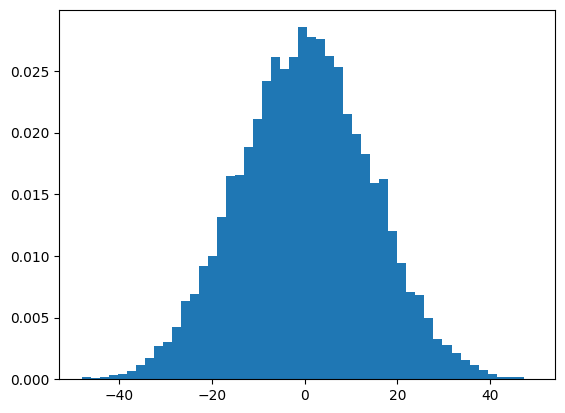

In [11]:
plt.hist(
    [y * 1e-3 for y in my_distro],
    bins=50,
    density=True,
    label="Monte-Carlo \n Simulation",
)
plt.show()

In [12]:
np.mean(my_distro)/1e3

0.10909943543700698

In [13]:
np.std(my_distro)/1e3

14.190144619524544

In [14]:
1e-3 *mycalc.variance_estimate(orig_atom,[1,1,1])**.5

14.144191262910997

In [15]:
# crystal object
xtal = Crystal(unit_cell, lattice)
# disorder computation vehicle, with 5 unitcell shells
mycalc = Disorder(xtal, 8)

orig_atom = AtomPos.create_from_atom(atom=fl, position=[0, 0, 0])
isqrt3 = 1/np.sqrt(3)
bfield = np.array([0,0,1])

# Monte Carlo to generate the distribution
start = timer()
my_distro = mycalc.simulation(orig_atom, 10000, bdir=bfield, filename="aligned.dat")
end = timer()
print("computation time " + str(end - start))

computation time 367.1627897999715


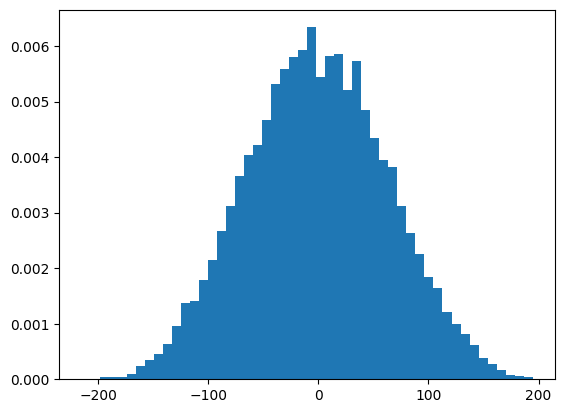

In [16]:
plt.hist(
    [y * 1e-3 for y in my_distro],
    bins=50,
    density=True,
    label="Monte-Carlo \n Simulation",
)
plt.show()

In [17]:
np.std(my_distro)/1e3

63.765849566448765